## Explanation for Non-Technical Audience

Imagine teaching a child to recognize numbers by showing them pictures of digits. Each time they see a picture, you guide their guesses and correct them if they're wrong, helping them focus on distinguishing features of different numbers. Over time, they learn to recognize these digits more accurately.

Similarly, the neural network:
- "Looks" at numerous examples of handwritten digits.
- Makes predictions on the digits' identities.
- Learns from any mistakes, gradually improving its ability to recognize digits.

The code prepared for this project essentially provides a set of instructions that enables the computer to learn from digit image data. The ultimate goal is for the computer to identify digits it has never seen before with high accuracy.

# Handwritten Digit Recognition Using Neural Networks

This project develops a neural network model to classify handwritten digits from the MNIST dataset. We'll explore the steps from data handling to predictions, ensuring the explanations are clear even for non-technical audiences.

## Overview of the Code Structure

### Data Preparation

#### Data Loading
The dataset, composed of images of handwritten digits, is loaded from a CSV file into a NumPy array. Each row in the dataset corresponds to one digit image.


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

In [5]:
data = pd.read_csv('train.csv')

In [7]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Shuffling
To prevent the model from learning any potential order in the data, the dataset is shuffled.

#### Splitting
The dataset is divided into two parts:
- **Development Set**: A smaller subset of data used for quick testing and iterative adjustments.
- **Training Set**: A larger subset used for the main model training process.

#### Normalization
The pixel values of the images range from 0 to 255. These are normalized by dividing by 255, converting them into a scale from 0 to 1, which simplifies processing by the neural network.

In [9]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [11]:
Y_train

array([6, 9, 8, ..., 7, 1, 1])

In [14]:
X_train[:,0].shape

(784,)

### Neural Network Setup

#### Architecture
- **Input Layer**: 784 units, corresponding to the 784 pixels in each flattened 28x28 input image.
- **Hidden Layer**: 10 neurons employing ReLU activation, enhancing the network's ability to learn non-linear patterns.
- **Output Layer**: 10 neurons using softmax activation, each representing one of the ten digit classes (0-9).

#### Activation Functions
- **ReLU (Rectified Linear Unit)**: Helps in learning non-linear complex patterns.
- **Softmax**: Converts the outputs into probabilities for each digit class.

### Forward Propagation

Each layer of the network processes the input it receives by computing a weighted sum followed by an activation function. The output is then passed on to the next layer.

### Backward Propagation

#### Error Calculation
The difference between the network's predictions and the actual labels is computed, indicating the learning required.

#### Gradient Computation
The network calculates gradients, which guide how the model's weights and biases should be adjusted to reduce prediction errors.

### Parameter Updates

Using the computed gradients, the model updates its parameters. This adjustment process is repeated across multiple iterations, enhancing the model's accuracy progressively.


In [57]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

    

### Testing and Predictions

#### Function Definitions
Specific functions are developed for applying the trained model to new data, calculating the model's accuracy, and visualizing prediction results.

#### Model Evaluation
After training, the model's effectiveness is tested on unseen data to assess how well it can generalize and classify new images.

In [58]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2
    

In [59]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[2 4 4 ... 4 5 9] [6 9 8 ... 7 1 1]
0.1037560975609756
Iteration:  10
[2 5 1 ... 3 5 8] [6 9 8 ... 7 1 1]
0.14585365853658536
Iteration:  20
[2 4 1 ... 3 2 8] [6 9 8 ... 7 1 1]
0.22478048780487805
Iteration:  30
[2 4 0 ... 3 1 8] [6 9 8 ... 7 1 1]
0.3244146341463415
Iteration:  40
[6 4 3 ... 3 1 8] [6 9 8 ... 7 1 1]
0.3841951219512195
Iteration:  50
[6 4 3 ... 3 1 8] [6 9 8 ... 7 1 1]
0.4322682926829268
Iteration:  60
[6 4 3 ... 3 1 8] [6 9 8 ... 7 1 1]
0.4732682926829268
Iteration:  70
[6 2 3 ... 3 1 8] [6 9 8 ... 7 1 1]
0.5120731707317073
Iteration:  80
[6 8 3 ... 3 1 8] [6 9 8 ... 7 1 1]
0.5471219512195122
Iteration:  90
[6 8 3 ... 3 1 8] [6 9 8 ... 7 1 1]
0.5812926829268292
Iteration:  100
[6 8 3 ... 3 1 8] [6 9 8 ... 7 1 1]
0.6136585365853658
Iteration:  110
[6 8 3 ... 3 1 8] [6 9 8 ... 7 1 1]
0.6416829268292683
Iteration:  120
[6 8 3 ... 7 1 8] [6 9 8 ... 7 1 1]
0.6660975609756098
Iteration:  130
[6 8 3 ... 7 1 8] [6 9 8 ... 7 1 1]
0.6858048780487805
Iteration:  140

In [60]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [6]
Label:  6


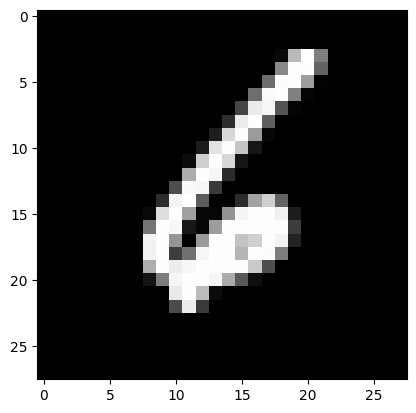

Prediction:  [8]
Label:  9


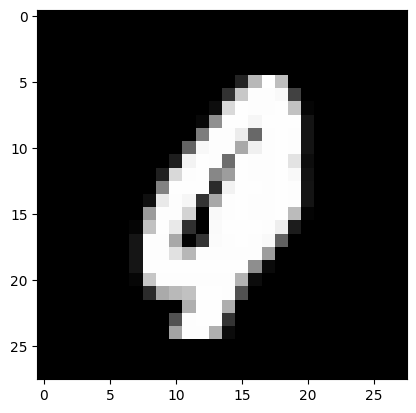

Prediction:  [8]
Label:  8


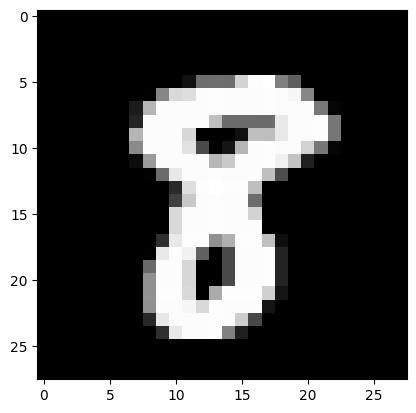

Prediction:  [7]
Label:  7


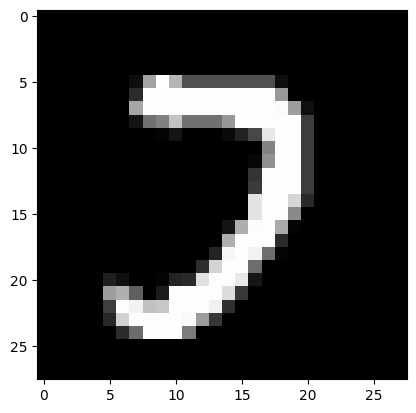

In [62]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [63]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[3 6 6 5 6 4 0 8 5 5 0 1 4 3 8 5 5 1 2 9 8 3 9 5 4 4 8 2 6 7 3 3 9 8 8 8 8
 8 4 4 8 2 8 9 1 5 7 7 0 6 9 1 3 6 6 8 1 6 9 5 7 1 0 3 0 2 6 7 1 0 4 0 9 3
 8 3 0 5 5 8 1 1 2 0 3 2 3 7 8 7 9 0 5 3 5 1 9 6 1 7 3 4 2 2 5 5 4 0 6 6 8
 9 3 9 8 1 7 1 3 2 0 1 6 8 7 7 3 7 0 7 0 2 8 1 7 4 7 4 2 6 7 6 7 0 5 9 9 1
 3 4 7 6 6 4 8 1 2 0 9 1 1 3 8 3 7 3 1 5 3 3 2 3 3 7 7 9 5 1 5 8 7 2 8 3 9
 4 1 1 8 2 9 1 7 9 7 3 6 7 2 5 1 2 4 0 0 1 1 1 4 8 5 7 6 7 9 9 6 9 6 6 4 5
 7 1 3 9 1 3 1 0 4 2 4 8 0 3 7 8 4 4 3 7 6 6 4 0 8 6 4 9 0 0 7 2 0 1 6 5 2
 1 2 0 1 4 7 8 2 3 1 8 7 8 7 5 1 4 5 9 7 0 5 6 2 3 8 2 4 6 1 8 2 3 2 3 0 9
 3 4 4 7 3 3 0 3 3 4 2 2 1 9 4 5 7 9 3 1 5 2 1 0 3 2 3 9 0 8 2 8 5 1 7 0 4
 3 9 4 4 0 7 1 6 4 4 2 5 0 0 5 4 5 1 2 3 8 1 3 1 8 2 8 3 5 1 1 6 8 6 8 5 6
 5 3 6 1 1 0 6 8 4 0 6 9 3 5 1 5 7 5 4 2 0 6 2 8 4 8 0 0 7 6 5 1 3 7 6 2 0
 7 3 6 2 6 4 0 9 8 9 0 9 4 7 5 8 5 0 9 3 4 9 0 6 8 7 3 0 2 6 9 5 9 5 0 9 7
 2 3 5 0 4 1 1 4 7 6 2 9 0 6 2 2 1 4 6 6 2 5 3 5 4 1 4 7 7 8 6 0 4 0 9 0 7
 8 2 8 3 6 9 5 4 5 9 4 5 

0.853

## Model Performance and Evaluation

The neural network achieved an accuracy rate of 85% on both the training and the development sets. This consistency between training and development performance suggests that the model generalizes well to new, unseen data, demonstrating robustness and reliability.

### Analysis of Results

With an 85% accuracy rate, our model correctly predicts the digit in an image 85 out of every 100 times. While this is a solid performance for a straightforward neural network setup, there are multiple ways we might improve this further.

### Suggestions for Future Improvements

1. **Increasing Model Complexity**
   - Consider adding more layers or increasing the number of neurons in the existing layers. This could help the model capture more complex patterns in the data.

2. **Advanced Optimization Techniques**
   - Implement optimization algorithms like Adam or RMSprop, which might help in achieving better and faster convergence.

3. **Regularization Techniques**
   - Apply techniques such as dropout, L2 regularization (weight decay), or even early stopping to combat overfitting.

4. **Data Augmentation**
   - Use techniques like rotation, scaling, and translation of images to increase the diversity of the training data, which can lead to better generalization.

5. **Hyperparameter Tuning**
   - Experiment with different values for the learning rate, batch size, or activation functions. Utilize methods like grid search or random search to find the best combination of parameters.

6. **Ensemble Methods**
   - Combining the predictions of several different models can often lead to better performance than any single model.

7. **Using Pretrained Models**
   - If applicable, consider using pretrained models as a starting point, which can be beneficial through transfer learning, especially to enhance feature extraction capabilities.

8. **Evaluation on More Diverse Data Sets**
   - Testing the model on a broader range of handwritten digit datasets or more varied handwriting samples to further assess its robustness and identify potential weaknesses.

These improvements could potentially increase the accuracy and reliability of the model, making it more effective at recognizing a wider variety of handwritten digits.

